## Opciones de comida saludable en las principales cadenas de comida rápida

### Intentando resolver un problema bastante común en la era actual, en la que en ciertas ocasiones optamos por el placer instantáneo sin ser conscientes de las consecuencias, mi objetivo en este Exploratory Data Analysis es proponer una clara toma de decisiones respecto a la opción más saludable posible dentro de los productos ofrecidos por las cadenas de comida rápida mas conocidas.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns

In [4]:
df = pd.read_csv("FastFoodNutritionMenuV2.csv")
df.shape

(1148, 14)

In [5]:
df_1 = pd.read_csv("fastfood 2.csv")
df_1.shape

(515, 17)

In [6]:
df.head()

,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502


In [7]:
df_1.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company               1148 non-null   object
 1   Item                  1148 non-null   object
 2   Calories              1147 non-null   object
 3   Calories from
Fat     642 non-null    object
 4   Total Fat
(g)         1091 non-null   object
 5   Saturated Fat
(g)     1091 non-null   object
 6   Trans Fat
(g)         1091 non-null   object
 7   Cholesterol
(mg)      1147 non-null   object
 8   Sodium 
(mg)          1147 non-null   object
 9   Carbs
(g)             1091 non-null   object
 10  Fiber
(g)             1091 non-null   object
 11  Sugars
(g)            1147 non-null   object
 12  Protein
(g)           1091 non-null   object
 13  Weight Watchers
Pnts  887 non-null    object
dtypes: object(14)
memory usage: 125.7+ KB


In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


In [10]:
df.dtypes

Company                  object
Item                     object
Calories                 object
Calories from\nFat       object
Total Fat\n(g)           object
Saturated Fat\n(g)       object
Trans Fat\n(g)           object
Cholesterol\n(mg)        object
Sodium \n(mg)            object
Carbs\n(g)               object
Fiber\n(g)               object
Sugars\n(g)              object
Protein\n(g)             object
Weight Watchers\nPnts    object
dtype: object

In [11]:
columnas_df_numericas = [ 'Calories', 'Calories from\nFat', 'Total Fat\n(g)',
       'Saturated Fat\n(g)', 'Trans Fat\n(g)', 'Cholesterol\n(mg)',
       'Sodium \n(mg)', 'Carbs\n(g)', 'Fiber\n(g)', 'Sugars\n(g)',
       'Protein\n(g)', 'Weight Watchers\nPnts'] 
for columna in columnas_df_numericas:
    df[columna] = pd.to_numeric(df[columna], errors='coerce')

In [12]:
df.dtypes

Company                   object
Item                      object
Calories                 float64
Calories from\nFat       float64
Total Fat\n(g)           float64
Saturated Fat\n(g)       float64
Trans Fat\n(g)           float64
Cholesterol\n(mg)        float64
Sodium \n(mg)            float64
Carbs\n(g)               float64
Fiber\n(g)               float64
Sugars\n(g)              float64
Protein\n(g)             float64
Weight Watchers\nPnts    float64
dtype: object

In [13]:
df_1.dtypes

restaurant      object
item            object
calories         int64
cal_fat          int64
total_fat        int64
sat_fat        float64
trans_fat      float64
cholesterol      int64
sodium           int64
total_carb       int64
fiber          float64
sugar            int64
protein        float64
vit_a          float64
vit_c          float64
calcium        float64
salad           object
dtype: object

In [14]:
columnas_df_1_numericas = ['salad'] 
for columna in columnas_df_1_numericas:
    df_1[columna] = pd.to_numeric(df_1[columna], errors='coerce')

In [15]:
columnas_df_1 = ['calories', 'cal_fat', 'total_fat', 'cholesterol', 'sodium', 'total_carb', 'sugar']
for columna in columnas_df_1:
    df_1[columna] = df_1[columna].astype('float64')

In [16]:
df_1.dtypes

restaurant      object
item            object
calories       float64
cal_fat        float64
total_fat      float64
sat_fat        float64
trans_fat      float64
cholesterol    float64
sodium         float64
total_carb     float64
fiber          float64
sugar          float64
protein        float64
vit_a          float64
vit_c          float64
calcium        float64
salad          float64
dtype: object

In [17]:
df.dtypes

Company                   object
Item                      object
Calories                 float64
Calories from\nFat       float64
Total Fat\n(g)           float64
Saturated Fat\n(g)       float64
Trans Fat\n(g)           float64
Cholesterol\n(mg)        float64
Sodium \n(mg)            float64
Carbs\n(g)               float64
Fiber\n(g)               float64
Sugars\n(g)              float64
Protein\n(g)             float64
Weight Watchers\nPnts    float64
dtype: object

In [18]:
df_1.rename(columns={"restaurant": "Company", "item":"Item","calories":"Calories","cal_fat":"Calories from\nFat",
                     "total_fat":"Total Fat\n(g)","sat_fat":"Saturated Fat\n(g)","trans_fat":"Trans Fat\n(g)",
                     "cholesterol":"Cholesterol\n(mg)","sodium":"Sodium \n(mg)","total_carb":"Carbs\n(g)",
                     "fiber":"Fiber\n(g)","sugar":"Sugars\n(g)","protein":"Protein\n(g)"}, inplace=True)

In [41]:
dff = pd.merge(df, df_1, how="outer")
dff.head()

,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts,vit_a,vit_c,calcium,salad
0,McDonald’s,Hamburger,250.0,80.0,9.0,3.5,0.5,25.0,520.0,31.0,2.0,6.0,12.0,247.5,NaN,NaN,NaN,NaN
1,McDonald’s,Cheeseburger,300.0,110.0,12.0,6.0,0.5,40.0,750.0,33.0,2.0,6.0,15.0,297.0,NaN,NaN,NaN,NaN
2,McDonald’s,Double Cheeseburger,440.0,210.0,23.0,11.0,1.5,80.0,1150.0,34.0,2.0,7.0,25.0,433.0,NaN,NaN,NaN,NaN
3,McDonald’s,McDouble,390.0,170.0,19.0,8.0,1.0,65.0,920.0,33.0,2.0,7.0,22.0,383.0,NaN,NaN,NaN,NaN
4,McDonald’s,Quarter Pounder® with Cheese,510.0,230.0,26.0,12.0,1.5,90.0,1190.0,40.0,3.0,9.0,29.0,502.0,NaN,NaN,NaN,NaN


In [47]:
dff["Company"].value_counts()

Company
McDonald’s     329
Taco Bell      298
Burger King    260
KFC            218
Wendy’s        154
Subway          96
Pizza Hut       74
Mcdonalds       57
Arbys           55
Sonic           53
Dairy Queen     42
Chick Fil-A     27
Name: count, dtype: int64

In [56]:
dff = dff.rename(index={"Mcdonalds":"McDonald’s"})

In [35]:
dff["salad"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1658   NaN
1659   NaN
1660   NaN
1661   NaN
1662   NaN
Name: salad, Length: 1663, dtype: float64

In [33]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1663 entries, 0 to 1662
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1663 non-null   object 
 1   Item                  1663 non-null   object 
 2   Calories              1648 non-null   float64
 3   Calories from
Fat     1145 non-null   float64
 4   Total Fat
(g)         1594 non-null   float64
 5   Saturated Fat
(g)     1593 non-null   float64
 6   Trans Fat
(g)         1594 non-null   float64
 7   Cholesterol
(mg)      1634 non-null   float64
 8   Sodium 
(mg)          1647 non-null   float64
 9   Carbs
(g)             1593 non-null   float64
 10  Fiber
(g)             1567 non-null   float64
 11  Sugars
(g)            1633 non-null   float64
 12  Protein
(g)           1593 non-null   float64
 13  Weight Watchers
Pnts  876 non-null    float64
 14  vit_a                 301 non-null    float64
 15  vit_c                 305 

In [58]:
dff

,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts,vit_a,vit_c,calcium,salad
0,McDonald’s,Hamburger,250.0,80.0,9.0,3.5,0.5,25.0,520.0,31.0,2.0,6.0,12.0,247.5,NaN,NaN,NaN,NaN
1,McDonald’s,Cheeseburger,300.0,110.0,12.0,6.0,0.5,40.0,750.0,33.0,2.0,6.0,15.0,297.0,NaN,NaN,NaN,NaN
2,McDonald’s,Double Cheeseburger,440.0,210.0,23.0,11.0,1.5,80.0,1150.0,34.0,2.0,7.0,25.0,433.0,NaN,NaN,NaN,NaN
3,McDonald’s,McDouble,390.0,170.0,19.0,8.0,1.0,65.0,920.0,33.0,2.0,7.0,22.0,383.0,NaN,NaN,NaN,NaN
4,McDonald’s,Quarter Pounder® with Cheese,510.0,230.0,26.0,12.0,1.5,90.0,1190.0,40.0,3.0,9.0,29.0,502.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,Taco Bell,Original Triple Double Crunchwrap,700.0,270.0,30.0,9.0,0.5,45.0,1550.0,85.0,9.0,7.0,23.0,NaN,15.0,6.0,25.0,NaN
1659,Taco Bell,Spicy Triple Double Crunchwrap,780.0,340.0,38.0,10.0,0.5,50.0,1850.0,87.0,9.0,8.0,23.0,NaN,20.0,10.0,25.0,NaN
1660,Taco Bell,Fiesta Taco Salad-Beef,780.0,380.0,42.0,10.0,1.0,60.0,1340.0,74.0,11.0,7.0,26.0,NaN,NaN,NaN,NaN,NaN
1661,Taco Bell,Fiesta Taco Salad-Chicken,720.0,320.0,35.0,7.0,0.0,70.0,1260.0,70.0,8.0,8.0,32.0,NaN,NaN,NaN,NaN,NaN


In [59]:
dff["Item"].nunique()

1548

In [66]:
dff[dff['Item']=="Cheeseburger"]

,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts,vit_a,vit_c,calcium,salad
1,McDonald’s,Cheeseburger,300.0,110.0,12.0,6.0,0.5,40.0,750.0,33.0,2.0,6.0,15.0,297.0,NaN,NaN,NaN,NaN
346,Burger King,Cheeseburger,280.0,120.0,13.0,6.0,0.5,45.0,560.0,27.0,1.0,7.0,15.0,278.0,NaN,NaN,NaN,NaN
347,Burger King,Cheeseburger,280.0,120.0,13.0,6.0,0.5,45.0,560.0,27.0,1.0,7.0,15.0,278.0,NaN,NaN,NaN,NaN
1154,Mcdonalds,Cheeseburger,300.0,100.0,12.0,5.0,0.5,40.0,680.0,33.0,2.0,7.0,15.0,NaN,10.0,2.0,10.0,NaN
1347,Burger King,Cheeseburger,300.0,130.0,14.0,6.0,0.0,45.0,710.0,28.0,1.0,6.0,16.0,NaN,NaN,NaN,NaN,NaN


In [77]:
df.head(1)

,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,McDonald’s,Hamburger,250.0,80.0,9.0,3.5,0.5,25.0,520.0,31.0,2.0,6.0,12.0,247.5


In [113]:
df.iloc[:, 2:]

,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,250.0,80.0,9.0,3.5,0.5,25.0,520.0,31.0,2.0,6.0,12.0,247.5
1,300.0,110.0,12.0,6.0,0.5,40.0,750.0,33.0,2.0,6.0,15.0,297.0
2,440.0,210.0,23.0,11.0,1.5,80.0,1150.0,34.0,2.0,7.0,25.0,433.0
3,390.0,170.0,19.0,8.0,1.0,65.0,920.0,33.0,2.0,7.0,22.0,383.0
4,510.0,230.0,26.0,12.0,1.5,90.0,1190.0,40.0,3.0,9.0,29.0,502.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1143,230.0,NaN,10.0,4.5,0.0,25.0,390.0,25.0,2.0,1.0,11.0,NaN
1144,310.0,NaN,13.0,6.0,0.0,35.0,540.0,33.0,2.0,1.0,15.0,NaN
1145,120.0,NaN,4.0,1.5,0.0,10.0,230.0,17.0,1.0,1.0,5.0,NaN
1146,200.0,NaN,6.0,2.5,0.0,15.0,370.0,27.0,2.0,2.0,8.0,NaN


### Seleccionamos las 4 cadenas más conocidas en nuestro país

In [126]:
df_McDonals = df[df['Company'].str.contains("McDonald")]
df_KFC = df[df['Company'].str.contains("KFC")]
df_Burger_King = df[df['Company'].str.contains("Burger King")]
df_Taco_Bell = df[df['Company'].str.contains("Taco Bell")]

In [ ]:
#df_McDonals = df[df['Company'].str.contains("McDonald")].iloc[:, 2:]
#df_KFC = df[df['Company'].str.contains("KFC")].iloc[:, 2:]
#df_Burger_King = df[df['Company'].str.contains("Burger King")].iloc[:, 2:]
#df_Taco_Bell = df[df['Company'].str.contains("Taco Bell")].iloc[:, 2:]

In [132]:
df_clean = pd.concat([df_McDonals, df_KFC, df_Burger_King, df_Taco_Bell], ignore_index=True)

In [133]:
df_clean.describe()

,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
count,905.000000,630.000000,851.000000,850.000000,851.000000,891.000000,904.000000,850.000000,837.000000,897.000000,851.000000,722.000000
mean,284.154696,117.555556,11.665687,3.979412,0.149236,40.791246,413.470133,39.017647,1.391876,25.210702,8.990599,303.321330
std,231.889908,131.909575,14.381509,5.087502,0.500055,69.497936,506.794531,33.077642,2.498197,32.833678,10.864076,244.823811
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,130.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,15.000000,0.000000,2.000000,0.000000,132.375000
50%,230.000000,80.000000,8.000000,2.500000,0.000000,15.000000,160.000000,34.000000,0.000000,10.000000,6.000000,265.750000
75%,400.000000,170.000000,18.000000,6.000000,0.000000,50.000000,642.500000,52.750000,2.000000,41.000000,13.000000,411.250000
max,1220.000000,750.000000,98.000000,33.000000,4.500000,575.000000,2890.000000,270.000000,31.000000,264.000000,71.000000,1317.000000


In [145]:
colores = ['#FF0000', '#EC1C24',  '#E31837', "#9D0101"]

In [146]:
sns.set_style("darkgrid")

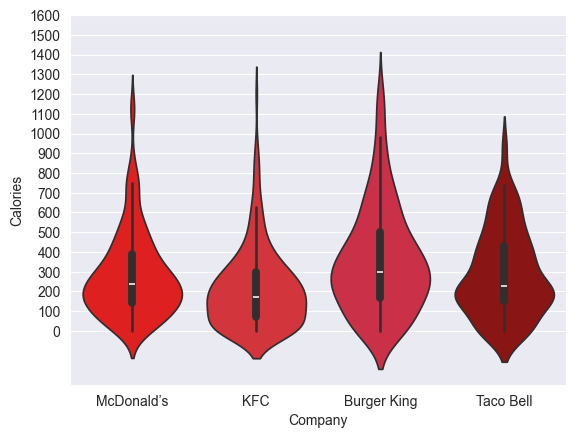

In [151]:
sns.violinplot(x="Company", y="Calories", data=df_clean,hue="Company", palette=colores)
plt.yticks(np.arange(0,1700,100));

/var/folders/7j/bbkbhjhs10q20kpbpr_379nr0000gn/T/ipykernel_8704/680275223.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="Company", y="Cholesterol\n(mg)", data=df_clean, palette=colores, size=2);
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 12.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 

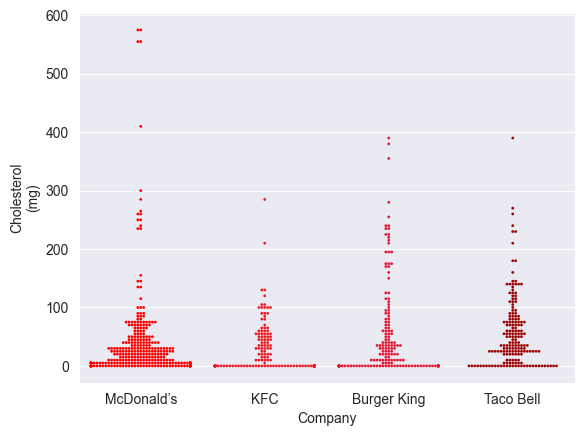

In [182]:
sns.swarmplot(x="Company", y="Cholesterol\n(mg)", data=df_clean, palette=colores, size=2);

In [98]:
df_McDonals['Calories'].idxmax()
df_McDonals["Calories"]

128

In [112]:
df_McDonals.dtypes

Company                   object
Item                      object
Calories                 float64
Calories from\nFat       float64
Total Fat\n(g)           float64
Saturated Fat\n(g)       float64
Trans Fat\n(g)           float64
Cholesterol\n(mg)        float64
Sodium \n(mg)            float64
Carbs\n(g)               float64
Fiber\n(g)               float64
Sugars\n(g)              float64
Protein\n(g)             float64
Weight Watchers\nPnts    float64
dtype: object

In [102]:
df_McDonals["Calories"].iloc[0:129]

0       250.0
1       300.0
2       440.0
3       390.0
4       510.0
        ...  
124     880.0
125     440.0
126     580.0
127     770.0
128    1160.0
Name: Calories, Length: 129, dtype: float64

In [155]:
df_McDonals['Cholesterol\n(mg)'].idxmax()

88

In [166]:
col = df_clean.drop(['Company',"Item"],axis = 1)
col

,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,250.0,80.0,9.0,3.5,0.5,25.0,520.0,31.0,2.0,6.0,12.0,247.5
1,300.0,110.0,12.0,6.0,0.5,40.0,750.0,33.0,2.0,6.0,15.0,297.0
2,440.0,210.0,23.0,11.0,1.5,80.0,1150.0,34.0,2.0,7.0,25.0,433.0
3,390.0,170.0,19.0,8.0,1.0,65.0,920.0,33.0,2.0,7.0,22.0,383.0
4,510.0,230.0,26.0,12.0,1.5,90.0,1190.0,40.0,3.0,9.0,29.0,502.0
...,...,...,...,...,...,...,...,...,...,...,...,...
915,380.0,NaN,NaN,NaN,NaN,80.0,104.0,NaN,NaN,103.0,NaN,NaN
916,390.0,NaN,NaN,NaN,NaN,80.0,105.0,NaN,NaN,105.0,NaN,NaN
917,0.0,NaN,NaN,NaN,NaN,160.0,NaN,NaN,NaN,0.0,NaN,NaN
918,380.0,NaN,NaN,NaN,NaN,80.0,101.0,NaN,NaN,101.0,NaN,NaN


<Axes: >

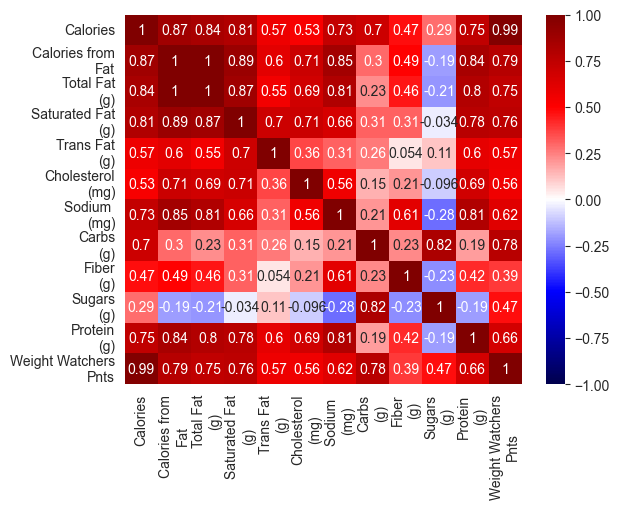

In [169]:
sns.heatmap(col.corr(numeric_only=True), annot=True, cmap="seismic", vmin=-1, vmax=1)

## hipotesis_1 = Hay ciertas opciones de menú en las cadenas de comida rápida que pueden resultar más saludables

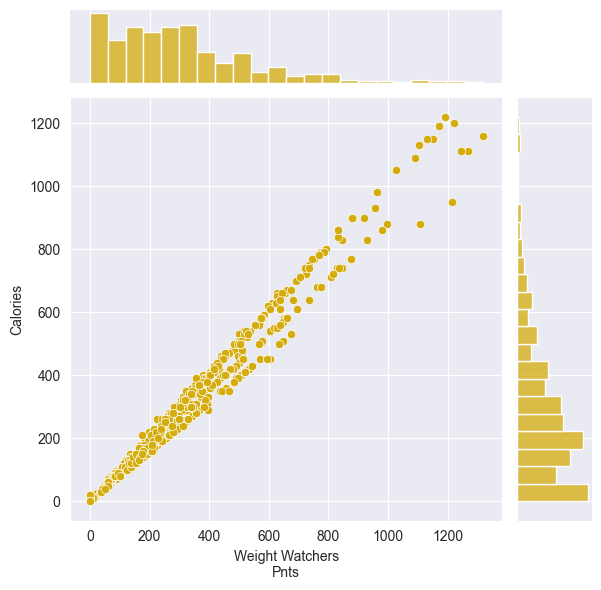

In [176]:
sns.jointplot(x=df_clean['Weight Watchers\nPnts'],
              y=df_clean['Calories'],
              color="#D4AC0D")

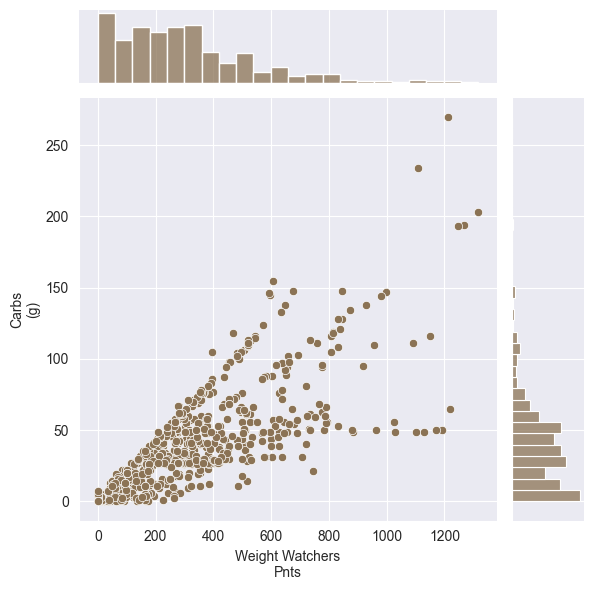

In [177]:
sns.jointplot(x=df_clean['Weight Watchers\nPnts'],
              y=df_clean['Carbs\n(g)'],
              color="#8B7355")

In [207]:
BK_good = df_Burger_King[df_Burger_King['Weight Watchers\nPnts']<100]
BK_good = df_Burger_King[df_Burger_King['Weight Watchers\nPnts']>50]
BK_good["Item"]


329                       Whopper® Sandwich
330           Whopper® Sandwich with Cheese
331        Bacon & Cheese Whopper® Sandwich
332                Double Whopper® Sandwich
333    Double Whopper® Sandwich with Cheese
                       ...                 
514         BK® Café Mocha Frappe- 16 fl oz
515         BK® Café Mocha Frappe- 20 fl oz
516       BK® Café Caramel Frappe- 12 fl oz
517       BK® Café Caramel Frappe- 16 fl oz
518       BK® Café Caramel Frappe- 20 fl oz
Name: Item, Length: 158, dtype: object

In [198]:
MC_good = df_McDonals[df_McDonals['Weight Watchers\nPnts']<100]
MC_better = MC_good[MC_good['Weight Watchers\nPnts']>70]
MC_better

,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
51,McDonald’s,Southwestern Chipotle Barbeque Sauce,60.0,0.0,0.0,0.0,0.0,0.0,210.0,15.0,1.0,11.0,0.0,71.0
60,McDonald’s,Premium Caesar Salad (without chicken),90.0,35.0,4.0,2.5,0.0,10.0,180.0,9.0,3.0,4.0,7.0,89.5
106,McDonald’s,Low Fat Caramel Dip,70.0,5.0,0.5,0.0,0.0,5.0,35.0,15.0,0.0,9.0,0.0,79.0
168,McDonald’s,POWERade® Mountain Blast (Child),70.0,0.0,0.0,0.0,0.0,0.0,65.0,20.0,0.0,16.0,0.0,86.0
195,McDonald’s,Iced Coffee with Sugar Free Vanilla Syrup (Med...,90.0,70.0,8.0,5.0,0.0,30.0,100.0,11.0,0.0,2.0,2.0,95.0
202,McDonald’s,Nonfat Cappuccino (Medium),80.0,0.0,0.0,0.0,0.0,5.0,110.0,12.0,0.0,12.0,8.0,84.0
203,McDonald’s,Nonfat Cappuccino (Large),90.0,0.0,0.0,0.0,0.0,5.0,130.0,13.0,0.0,13.0,9.0,94.0
204,McDonald’s,Nonfat Latte (Small),90.0,0.0,0.0,0.0,0.0,5.0,115.0,13.0,0.0,13.0,9.0,94.0
226,McDonald’s,Nonfat Cappuccino with Sugar Free Vanilla Syru...,70.0,0.0,0.0,0.0,0.0,5.0,130.0,19.0,0.0,10.0,7.0,73.0
227,McDonald’s,Nonfat Cappuccino with Sugar Free Vanilla Syru...,80.0,0.0,0.0,0.0,0.0,5.0,150.0,22.0,0.0,11.0,8.0,83.0


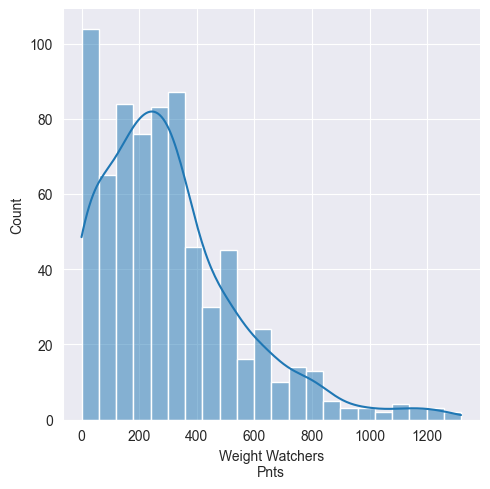

In [211]:
sns.displot(df_clean['Weight Watchers\nPnts'], kde=True)